  2.504955 seconds (2.44 M allocations: 147.020 MiB, 2.09% gc time, 98.01% compilation time)


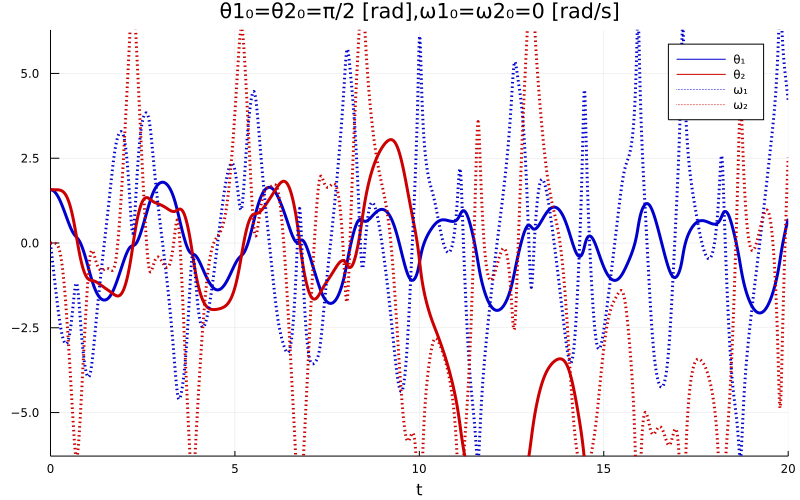

In [8]:
#May 26th, 2021
#2重振り子

using LinearAlgebra,DifferentialEquations,Plots,StaticArrays #add

#parameters
g=9.8    # m/s²
m1=1.0   # kg
m2=1.0   # kg
l1=1.0   # m
l2=1.0   # m

p = (; g, m1, m2, l1, l2) #add

function Twopendulum(du,u,p,t)
    g, m1, m2, l1, l2 = p #add
    du[1] = u[3]  #dθ1/dt = ω1
    du[2] = u[4]  #dθ2/dt = ω2
    
    #F1,F2の計算
    Δθ = u[1]-u[2]
    # @SMatrix,@SVectorの追加
    A  = @SMatrix [(m1+m2)*l1  m2*l2*cos(Δθ) ; m2*l1*cos(Δθ)  m2*l2]
    B  = @SMatrix [-m2*l2*u[4]^2*sin(Δθ)  -(m1+m2)*g*sin(u[1])  ; m2*l1*u[3]^2*sin(Δθ)  -m2*g*sin(u[2])]
    U  = @SVector [1.0 , 1.0]
    C  = A\B*U
    F1 = C[1]
    F2 = C[2]

    du[3] = F1    #dω1/dt = F1
    du[4] = F2    #dω2/dt = F2
end

Sol = []
Plt = []
Lx = 20.0
Ly = 2*pi
dcolor = 0.1
tinterval = (0.0,Lx)

# (1)２つ目の振り子の角度を変化させる場合
@time for i=1:1
    #initial conditions
    θ = [pi/2.0 for i=1:2]
    ω = [0.0 for i=1:2]
    u₀ = [θ ; ω]
    prob2 = ODEProblem(Twopendulum,u₀,tinterval,p)
    sol = solve(prob2, Tsit5(), reltol=1e-8, abstol=1e-8)
    push!(Sol, sol)
      
    plt = plot(Sol[i], lw=3,
               xlim = (0.0, Lx),ylim = (-Ly,Ly),
               title="θ1₀=θ2₀=π/2 [rad],ω1₀=ω2₀=0 [rad/s]",
               linestyle = [:solid :solid :dot :dot],
               lc = [RGB(0.0,0.0,dcolor*8) RGB(dcolor*8,0.0,0.0) RGB(0.0,0.0,dcolor*8) RGB(dcolor*8,0.0,0.0)],
               label = ["θ₁" "θ₂" "ω₁" "ω₂"]
    )
    push!(Plt, plt)
end

xlength = 800
ylength = 500

plot(Plt...; size=(xlength,ylength))